In [56]:
import pandas as pd
import os
import sys
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Get the current working directory
current_dir = os.getcwd() 

# Calculate the parent directory (or the project root)
project_root = os.path.dirname(current_dir)

# Append it to sys.path
sys.path.append(project_root)

In [58]:
print("Project root added to sys.path:", project_root)

Project root added to sys.path: c:\Users\Besitzer\OneDrive\Dokumente\CBS_Copenhagen\Semester\WS2025\AdvCV\Final Exam\CV_Test


In [59]:
# Define the paths relative to the project root
relative_head_path = r"data\Head\misclassifications_head_new.json"
relative_neckHead_path = r"data\NeckHead\misclassifications_neckHead_new.json"
relative_entireModel_path = r"data\EntireModel\misclassifications_entireModel_new.json"
relative_classes_path = r"configs\data.yaml"

# Join the project root with the relative paths to get the correct absolute paths
head_path = os.path.join(project_root, relative_head_path)
neckHead_path = os.path.join(project_root, relative_neckHead_path)
entireModel_path = os.path.join(project_root, relative_entireModel_path)
classes_path = os.path.join(project_root, relative_classes_path)

In [60]:
misclassifications_head = pd.read_json(head_path, orient='split')
misclassifications_neckHead = pd.read_json(neckHead_path, orient='split')
misclassifications_entireModel = pd.read_json(entireModel_path, orient='split')

In [61]:
# 1. Read the YAML file
with open(classes_path, 'r') as f:
    yaml_data = yaml.safe_load(f)

# Extract the names and create a mapping
names = yaml_data['names']

# Create the DataFrame with class IDs (0-51 for cards, 52 for background)
df_class_map = pd.DataFrame({
    'class_id': list(range(len(names))) + [55],
    'class_name': names + ['background']
})

In [62]:
# Optional: Translate German card names to English
# Comment out or skip this cell to keep original German names

german_to_english = {
    # Hearts (Herz)
    'h2': '2 of Hearts', 'h3': '3 of Hearts', 'h4': '4 of Hearts', 'h5': '5 of Hearts',
    'h6': '6 of Hearts', 'h7': '7 of Hearts', 'h8': '8 of Hearts', 'h9': '9 of Hearts', 'h10': '10 of Hearts',
    'ha': 'Ace of Hearts', 'hb': 'Jack of Hearts', 'hh': 'King of Hearts', 'hv': 'Queen of Hearts',
    
    # Clubs (Kreuz)
    'k2': '2 of Clubs', 'k3': '3 of Clubs', 'k4': '4 of Clubs', 'k5': '5 of Clubs',
    'k6': '6 of Clubs', 'k7': '7 of Clubs', 'k8': '8 of Clubs', 'k9': '9 of Clubs', 'k10': '10 of Clubs',
    'ka': 'Ace of Clubs', 'kb': 'Jack of Clubs', 'kh': 'King of Clubs', 'kv': 'Queen of Clubs',
    
    # Diamonds (Karo/Rot)
    'r2': '2 of Diamonds', 'r3': '3 of Diamonds', 'r4': '4 of Diamonds', 'r5': '5 of Diamonds',
    'r6': '6 of Diamonds', 'r7': '7 of Diamonds', 'r8': '8 of Diamonds', 'r9': '9 of Diamonds', 'r10': '10 of Diamonds',
    'ra': 'Ace of Diamonds', 'rb': 'Jack of Diamonds', 'rh': 'King of Diamonds', 'rv': 'Queen of Diamonds',
    
    # Spades (Pik/Schippen)
    's2': '2 of Spades', 's3': '3 of Spades', 's4': '4 of Spades', 's5': '5 of Spades',
    's6': '6 of Spades', 's7': '7 of Spades', 's8': '8 of Spades', 's9': '9 of Spades', 's10': '10 of Spades',
    'sa': 'Ace of Spades', 'sb': 'Jack of Spades', 'sh': 'King of Spades', 'sv': 'Queen of Spades',
    
    # Special cards
    'j': 'Joker',
    'pile-face-down': 'Pile of cards face down',
    'pile-face-up': 'Pile of cards face up'
}

# Apply translation to the class mapping dataframe
df_class_map['class_name'] = df_class_map['class_name'].replace(german_to_english)

print("German card names translated to English")
print(f"Translated {len([k for k in german_to_english.keys() if k in df_class_map['class_name'].values])} card names")

German card names translated to English
Translated 0 card names


In [63]:
# join the misclassification data with the class names for true class
misclassifications_head = misclassifications_head.merge(df_class_map, left_on='True_Class_Index', right_on='class_id', how='left').drop(columns=['class_id'])
# change column name
misclassifications_head = misclassifications_head.rename(columns={'class_name': 'True_ClassName'})

# join the misclassification data with the class names for predicted class
misclassifications_head = misclassifications_head.merge(df_class_map, left_on='Predicted_Class_Index', right_on='class_id', how='left').drop(columns=['class_id'])
# change column name
misclassifications_head = misclassifications_head.rename(columns={'class_name': 'Predicted_ClassName'})

# drop columns
misclassifications_head = misclassifications_head.drop(columns=['True_Class_Index', 'Predicted_Class_Index','Is_Correct', 'True_Class_Name', 'Predicted_Class_Name'])

In [64]:
# join the misclassification data with the class names for true class
misclassifications_neckHead = misclassifications_neckHead.merge(df_class_map, left_on='True_Class_Index', right_on='class_id', how='left').drop(columns=['class_id'])
# change column name
misclassifications_neckHead = misclassifications_neckHead.rename(columns={'class_name': 'True_ClassName'})

# join the misclassification data with the class names for predicted class
misclassifications_neckHead = misclassifications_neckHead.merge(df_class_map, left_on='Predicted_Class_Index', right_on='class_id', how='left').drop(columns=['class_id'])
# change column name
misclassifications_neckHead = misclassifications_neckHead.rename(columns={'class_name': 'Predicted_ClassName'})

# drop columns
misclassifications_neckHead = misclassifications_neckHead.drop(columns=['True_Class_Index', 'Predicted_Class_Index','Is_Correct', 'True_Class_Name', 'Predicted_Class_Name'])

In [65]:
# join the misclassification data with the class names for true class
misclassifications_entireModel = misclassifications_entireModel.merge(df_class_map, left_on='True_Class_Index', right_on='class_id', how='left').drop(columns=['class_id'])
# change column name
misclassifications_entireModel = misclassifications_entireModel.rename(columns={'class_name': 'True_ClassName'})

# join the misclassification data with the class names for predicted class
misclassifications_entireModel = misclassifications_entireModel.merge(df_class_map, left_on='Predicted_Class_Index', right_on='class_id', how='left').drop(columns=['class_id'])
# change column name
misclassifications_entireModel = misclassifications_entireModel.rename(columns={'class_name': 'Predicted_ClassName'})

# drop columns
misclassifications_entireModel = misclassifications_entireModel.drop(columns=['True_Class_Index', 'Predicted_Class_Index','Is_Correct', 'True_Class_Name', 'Predicted_Class_Name'])

In [66]:
# count background misclassifications for true and predicted classes
background_true_count = misclassifications_head[misclassifications_head['True_ClassName'] == 'background']['Count'].sum()
background_predicted_count = misclassifications_head[misclassifications_head['Predicted_ClassName'] == 'background']['Count'].sum() 
print(f"Background as TRUE class misclassifications (Head Model): {background_true_count}")
print(f"Background as PREDICTED class misclassifications (Head Model): {background_predicted_count}")

Background as TRUE class misclassifications (Head Model): 5453
Background as PREDICTED class misclassifications (Head Model): 499


Background as TRUE: The model predicted a card where no card was present.

Background as PREDICTED: The model missed a card where one should have been detected.

In [67]:
methods = {
    'Head Model': misclassifications_head,
    'NeckHead Model': misclassifications_neckHead,
    'Entire Model': misclassifications_entireModel
}

In [68]:
def get_error_data(df):
    """Returns the total error count and the top confusion pattern for the worst class."""
    
    # 1. Calculate Total Misclassifications
    df_errors = df[df['Error_Type'] == 'Misclassification']
    total_errors = df_errors['Count'].sum()
    
    # 2. Identify the Worst Struggling Class
    struggling_true_classes = df_errors.groupby('True_ClassName')['Count'].sum().sort_values(ascending=False)
    
    if struggling_true_classes.empty:
        return total_errors, None

    worst_class_name = struggling_true_classes.index[0] 
    
    # 3. Get the Confusion Pattern for the Worst Class
    worst_class_df = df_errors[df_errors['True_ClassName'] == worst_class_name]
    confusion_pattern = worst_class_df.groupby('Predicted_ClassName')['Count'].sum().sort_values(ascending=False).head(5)
    confusion_pattern.name = worst_class_name # Rename series to the class name for clarity
    
    return total_errors, confusion_pattern

C:\Users\Besitzer\AppData\Local\Temp\ipykernel_3680\1572695157.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Total Errors', data=df_total_errors, palette='viridis')


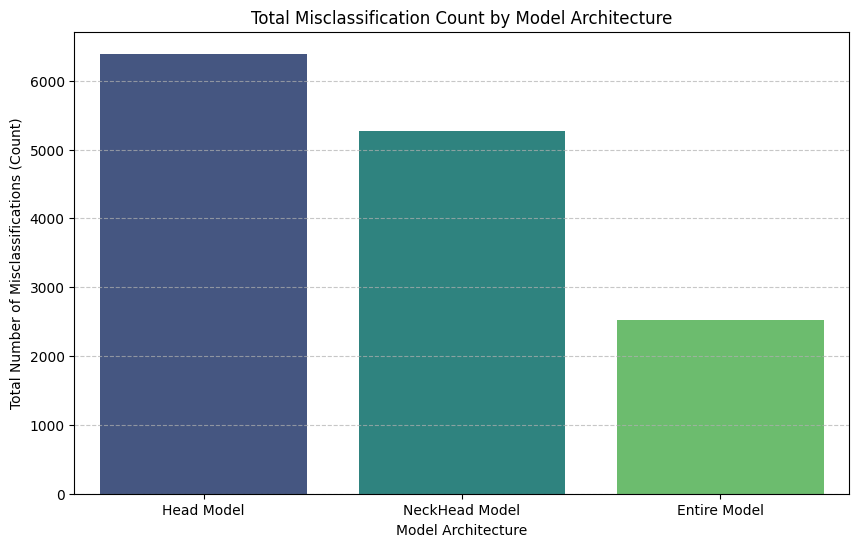

In [69]:
# --- Main Plotting Script ---

# 1. Pre-process and collect data for plotting
total_errors = {}
confusion_data = {} # Will hold the top 5 confusion patterns for the worst class of each model

for name, df in methods.items():
    errors, confusion_pattern = get_error_data(df)
    total_errors[name] = errors
    if confusion_pattern is not None:
        confusion_data[name] = confusion_pattern

# Convert collected data into DataFrames for easy plotting
df_total_errors = pd.Series(total_errors).sort_values(ascending=False).reset_index()
df_total_errors.columns = ['Model', 'Total Errors']

# Combine all confusion patterns into a single DataFrame for the stacked plot
if confusion_data:
    df_confusion_combined = pd.DataFrame(confusion_data).fillna(0)
    # The index will be the Predicted_ClassName
    df_confusion_combined.index.name = 'Predicted_ClassName'
    df_confusion_combined = df_confusion_combined.reset_index()
    
# --- Plot 1: Total Misclassifications by Model ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Total Errors', data=df_total_errors, palette='viridis')
plt.title('Total Misclassification Count by Model Architecture')
plt.xlabel('Model Architecture')
plt.ylabel('Total Number of Misclassifications (Count)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

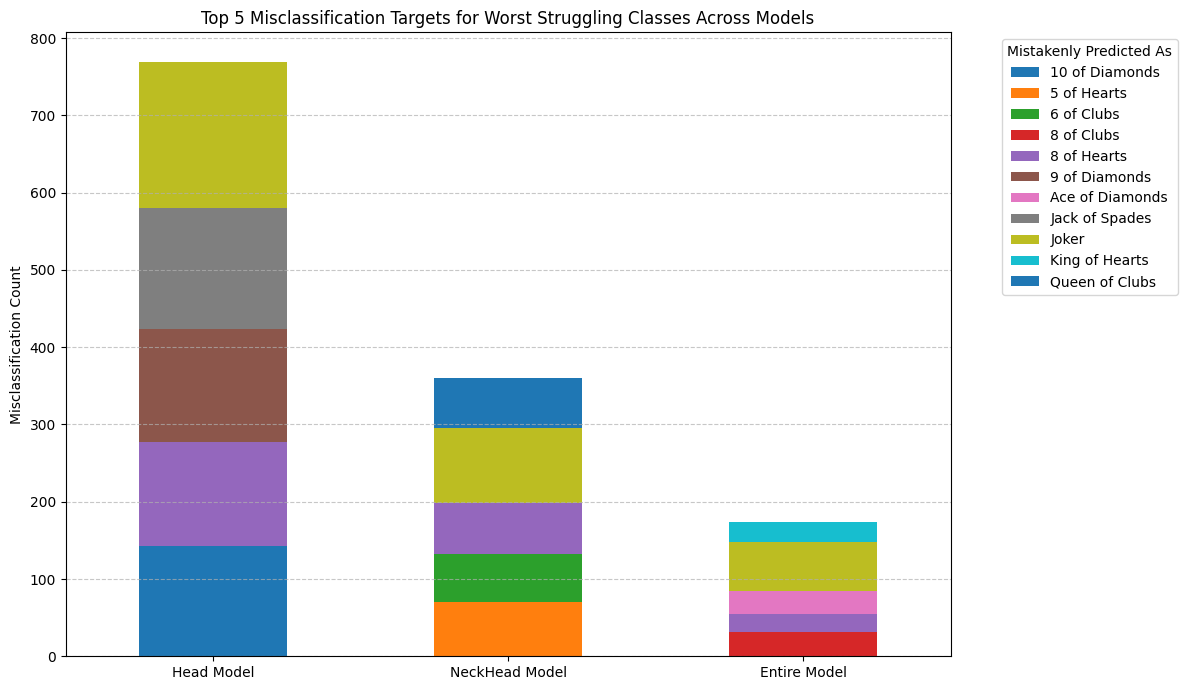

In [70]:
# --- Plot 2: Top Confusion Patterns for the Worst Struggling Class ---
if confusion_data:
    # Set the Predicted_ClassName as the index
    plot_df = df_confusion_combined.set_index('Predicted_ClassName')
    
    # Check if there's any data remaining after filtering
    if not plot_df.empty:
        plot_df.T.plot(kind='bar', stacked=True, figsize=(12, 7))
        
        # Get the names of the worst classes for the title
        worst_classes = [s.name for s in confusion_data.values()]
        
        plt.title(f'Top 5 Misclassification Targets for Worst Struggling Classes Across Models')
        #plt.xlabel(f'Model Architecture (Worst True Classes: {", ".join(worst_classes)})')
        plt.ylabel('Misclassification Count')
        plt.xticks(rotation=0)
        plt.legend(title='Mistakenly Predicted As', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("\nCould not generate the Confusion Plot as the combined confusion data is empty.")
else:
    print("\nCould not generate the Confusion Plot as no confusion data was returned.")

- Background means model has missed a card where should have been one
- Neck + Head & Entire are pretty confident --> manly missing cards not predicting falsly
- Head only also missclassfies a lot of cards

In [71]:
# most misclassified combinations
for name, df in methods.items():
    print(f"\nMost Misclassified Combinations for {name}:")
    misclassified_combinations = df[df['Error_Type'] == 'Misclassification']
    top_combinations = misclassified_combinations.sort_values(by='Count', ascending=False).head(10)
    print(top_combinations[['True_ClassName', 'Predicted_ClassName', 'Count']])


Most Misclassified Combinations for Head Model:
  True_ClassName Predicted_ClassName  Count
0     background               Joker    189
1     background      Jack of Spades    156
2     background       9 of Diamonds    147
3     background      10 of Diamonds    143
4     background         8 of Hearts    134
5     background         4 of Hearts    131
8     background       7 of Diamonds    124
6     background      Jack of Hearts    124
7     background       King of Clubs    124
9     background      Queen of Clubs    122

Most Misclassified Combinations for NeckHead Model:
   True_ClassName Predicted_ClassName  Count
6      background               Joker     98
14     background         5 of Hearts     70
17     background         8 of Hearts     65
19     background      Queen of Clubs     64
21     background          6 of Clubs     63
23     background      King of Hearts     61
24     background         4 of Hearts     60
29     background          9 of Clubs     58
28     ba


Top 10 Card-to-Card Misclassifications for Head Model:
      True_ClassName Predicted_ClassName  Count
68     Ace of Spades        Ace of Clubs     20
75     Ace of Spades          3 of Clubs     16
76        3 of Clubs       Ace of Spades     16
82      Ace of Clubs       Ace of Spades     13
86       3 of Spades         2 of Spades     10
88      10 of Hearts       9 of Diamonds     10
99   Queen of Hearts       Ace of Hearts      8
101    2 of Diamonds         3 of Hearts      8
103      2 of Spades         3 of Spades      8
106    2 of Diamonds       3 of Diamonds      7


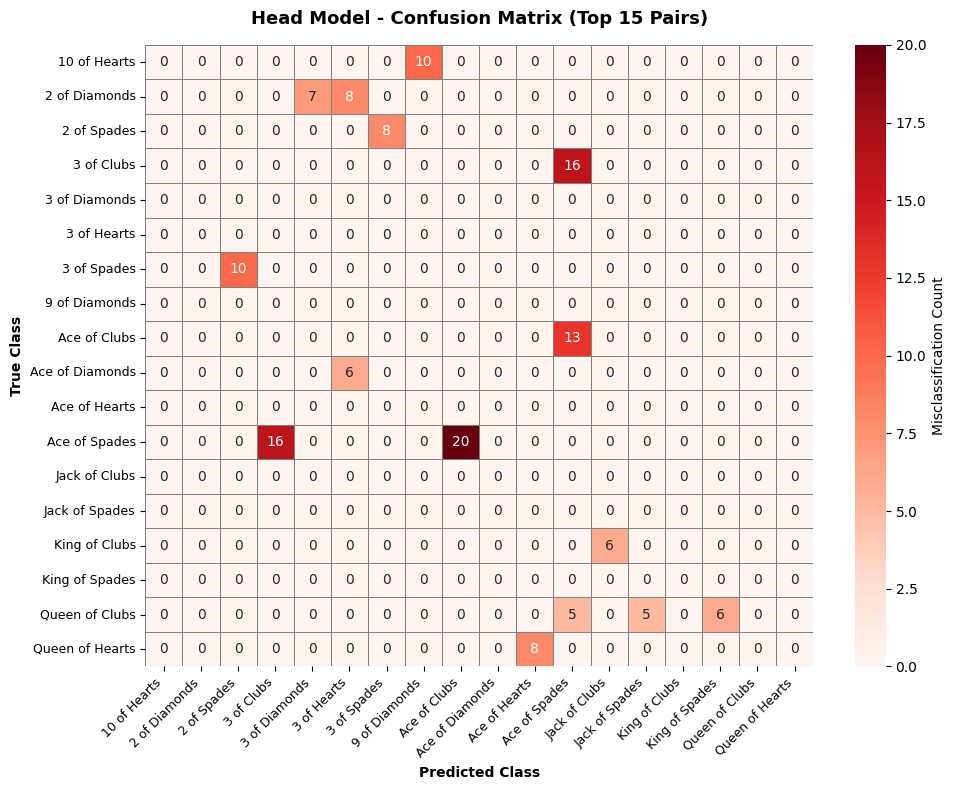


Total card-to-card misclassifications: 440
Number of unique confusion pairs: 183
Most confused pair: Ace of Spades → Ace of Clubs (20 times)

Top 10 Card-to-Card Misclassifications for NeckHead Model:
      True_ClassName Predicted_ClassName  Count
106       9 of Clubs          8 of Clubs     30
115   Queen of Clubs     Queen of Spades     27
122  Ace of Diamonds       Ace of Hearts     25
126     Ace of Clubs       Ace of Spades     24
131       4 of Clubs          5 of Clubs     23
141       3 of Clubs          2 of Clubs     22
136      2 of Spades         3 of Spades     22
142      3 of Spades         2 of Spades     22
144    Ace of Hearts     Ace of Diamonds     20
150    5 of Diamonds       6 of Diamonds     18


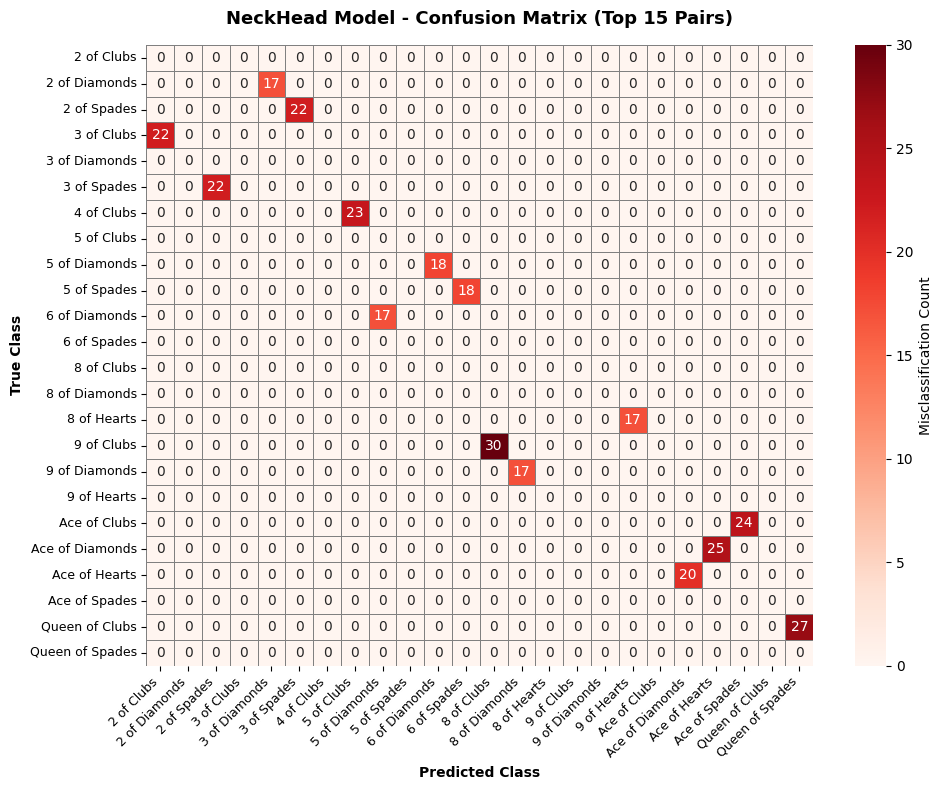


Total card-to-card misclassifications: 1348
Number of unique confusion pairs: 309
Most confused pair: 9 of Clubs → 8 of Clubs (30 times)

Top 10 Card-to-Card Misclassifications for Entire Model:
      True_ClassName Predicted_ClassName  Count
88       5 of Spades         6 of Spades     19
118       6 of Clubs          8 of Clubs     14
126    6 of Diamonds       9 of Diamonds     14
128    King of Clubs      Queen of Clubs     13
133     Ace of Clubs       Ace of Spades     13
136    Ace of Hearts     Ace of Diamonds     13
143  Queen of Spades      Queen of Clubs     11
147   Queen of Clubs      King of Spades     10
148      2 of Spades          2 of Clubs     10
149       9 of Clubs          6 of Clubs     10


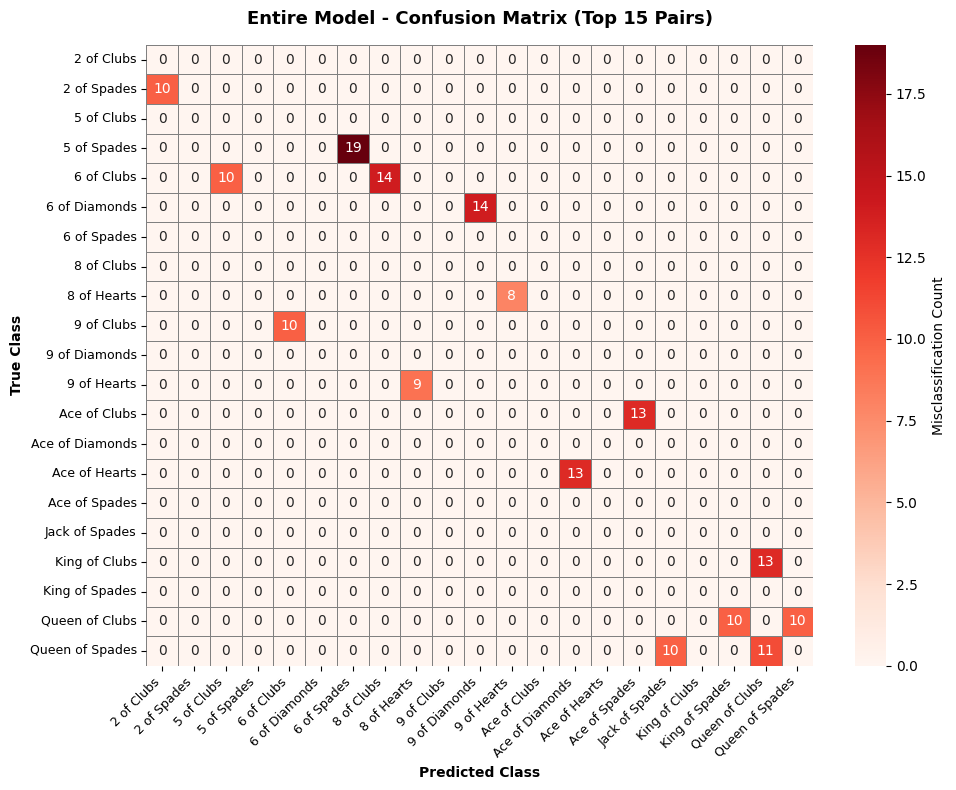


Total card-to-card misclassifications: 722
Number of unique confusion pairs: 250
Most confused pair: 5 of Spades → 6 of Spades (19 times)


In [82]:
for name, df in methods.items():
    print(f"\n{'='*50}")
    print(f"Top 10 Card-to-Card Misclassifications for {name}:")
    print(f"{'='*50}")

    # 1. Filter for all misclassifications
    misclassified_combinations = df[df['Error_Type'] == 'Misclassification']
    
    # 2. FILTER OUT Background from TRUE Class
    df_filtered = misclassified_combinations[
        misclassified_combinations['True_ClassName'] != 'background'
    ]
    
    # 3. FILTER OUT Background from PREDICTED Class
    df_filtered = df_filtered[
        df_filtered['Predicted_ClassName'] != 'background'
    ]

    # 4. Sort and display the top 10 remaining pure classification errors
    top_combinations = df_filtered.sort_values(by='Count', ascending=False).head(10)
    
    print(top_combinations[['True_ClassName', 'Predicted_ClassName', 'Count']])

    if len(top_combinations) > 0:
        # Get top 15 most confused cards
        top_15 = df_filtered.sort_values(by='Count', ascending=False).head(15)
        
        # Get unique true and predicted classes from top 15
        all_classes = sorted(set(top_15['True_ClassName'].tolist() + top_15['Predicted_ClassName'].tolist()))
        
        # Create confusion matrix
        confusion_matrix = pd.DataFrame(0, index=all_classes, columns=all_classes)
        for _, row in top_15.iterrows():
            confusion_matrix.loc[row['True_ClassName'], row['Predicted_ClassName']] = row['Count']
        
        # Plot confusion matrix heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Reds', 
                   cbar_kws={'label': 'Misclassification Count'},
                   linewidths=0.5, linecolor='gray')
        plt.title(f'{name} - Confusion Matrix (Top 15 Pairs)', fontsize=13, fontweight='bold', pad=15)
        plt.xlabel('Predicted Class', fontweight='bold')
        plt.ylabel('True Class', fontweight='bold')
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"\nTotal card-to-card misclassifications: {df_filtered['Count'].sum()}")
        print(f"Number of unique confusion pairs: {len(df_filtered)}")
        print(f"Most confused pair: {top_combinations.iloc[0]['True_ClassName']} → {top_combinations.iloc[0]['Predicted_ClassName']} ({int(top_combinations.iloc[0]['Count'])} times)")
    else:
        print("No card-to-card misclassifications found.")